In [1]:
import pandas as pd
### import pandas of course!


In [35]:
## retrieve data from city of melbourne data portal - filter to 2020
## https://data.melbourne.vic.gov.au/resource/b2ak-trbp.csv?$where=year=2020&$limit=999999999999999 
## save and name this file where you will be working on it in this notebook
df=pd.read_csv('pedestrian_data_sept2020.csv')


In [37]:
df.describe()
df.date_time=pd.to_datetime(df.date_time)  # enforce date_time parsing


In [13]:
df.head()


,id,date_time,year,month,mdate,day,time,sensor_id,sensor_name,hourly_counts
0,3302900,2020-08-31T22:00:00.000,2020,August,31,Monday,22,62,La Trobe St (North),3
1,3302899,2020-08-31T22:00:00.000,2020,August,31,Monday,22,61,Swanston St - RMIT Building 14,8
2,3302898,2020-08-31T22:00:00.000,2020,August,31,Monday,22,59,Swanston St - RMIT Building 80,0
3,3302897,2020-08-31T22:00:00.000,2020,August,31,Monday,22,58,Bourke St - Spencer St (North),31
4,3302896,2020-08-31T22:00:00.000,2020,August,31,Monday,22,57,Bourke St Bridge,1


In [38]:
type(df.date_time)
df.set_index(['date_time'])
# reduce to 2020 values, if not already done so -- the above download command filters the api on 2020 data.
df=df[df.year.eq(2020)]

In [39]:
df.sensor_id.unique()

array([62, 61, 59, 58, 57, 56, 55, 52, 51, 50, 49, 48, 47, 46, 41, 45, 35,
       44, 43, 42, 29, 36, 40, 37, 39, 34, 30, 31, 28, 27, 22, 19, 20, 21,
       25, 23, 24, 26, 14,  6,  5,  7,  8, 11, 12, 10,  9,  3,  1,  2, 53,
       18, 17,  4, 66, 65, 64, 63, 54, 15], dtype=int64)

In [40]:
print('Columns: %s' % df.columns)

Columns: Index(['id', 'date_time', 'year', 'month', 'mdate', 'day', 'time', 'sensor_id',
       'sensor_name', 'hourly_counts'],
      dtype='object')


In [41]:
# try one sensor
df1=df[df.sensor_id.eq(2)]
df1.index=df1.date_time
df3=df1.groupby('sensor_id').resample('W')['hourly_counts'].sum()
print(df3)
#df3.to_csv('df3.csv')

#df.groupby('Sensor_ID').resample('W-Mon',how='Date_Time').sum().reset_index().sort_values(by='Date_Time')
print(df.sensor_id.eq(1))



sensor_id  date_time 
2          2020-01-05    106173
           2020-01-12    151345
           2020-01-19    147713
           2020-01-26    164188
           2020-02-02    131924
           2020-02-09    136308
           2020-02-16    135822
           2020-02-23    144951
           2020-03-01    142899
           2020-03-08    144680
           2020-03-15    128639
           2020-03-22     82800
           2020-03-29     35179
           2020-04-05     20395
           2020-04-12     18297
           2020-04-19     21511
           2020-04-26     22558
           2020-05-03     25686
           2020-05-10     30418
           2020-05-17     36292
           2020-05-24     42063
           2020-05-31     46361
           2020-06-07     52106
           2020-06-14     55014
           2020-06-21     58840
           2020-06-28     54736
           2020-07-05     50022
           2020-07-12     33412
           2020-07-19     26205
           2020-07-26     23866
           2020-08

In [51]:
## dont need to repeat this step
big_df=[]
sensor_ids=df.sensor_id.unique()           
for i in sensor_ids:
    dfi=df[df.sensor_id.eq(i)]
    dfi.index=dfi.date_time
    df3=dfi.groupby('sensor_id').resample('W')['hourly_counts'].sum()
    #big_df.append(df3,ignore_index=True   ## not using this because frames are pasted side by side. use bash instead..
    fname='df%s.csv' % i
    df3.to_csv(fname)
    



In [59]:
# use bash to combine dataframes into one: for i in df*.csv;do cat ${i};done > output.csv
# echo "sensor_id,week,counts" > sensors_header.csv
# paste -d "\n" sensor_header.csv output.csv > combined.csv
# sed -i '/^$/d' combined.csv
new_df=pd.read_csv('combined.csv')

""


In [60]:
new_df.tail()

,sensor_id,week,counts
2119,9,2020-08-09,7096.0
2120,9,2020-08-16,5628.0
2121,9,2020-08-23,4912.0
2122,9,2020-08-30,5578.0
2123,9,2020-09-06,831.0


In [ ]:
### we now have a dataframe listing sensors and their counts reduced to 1 week time frames from beginning of 2020.



In [63]:
len(new_df['week'].unique())  ## how many weeks were recorded?

36

In [73]:
new_df.groupby('week')['counts'].sum().head()  # look at total counts of all sensors per week.

week
2020-01-05    3326606.0
2020-01-12    5114614.0
2020-01-19    5328461.0
2020-01-26    5904365.0
2020-02-02    4571176.0
Name: counts, dtype: float64

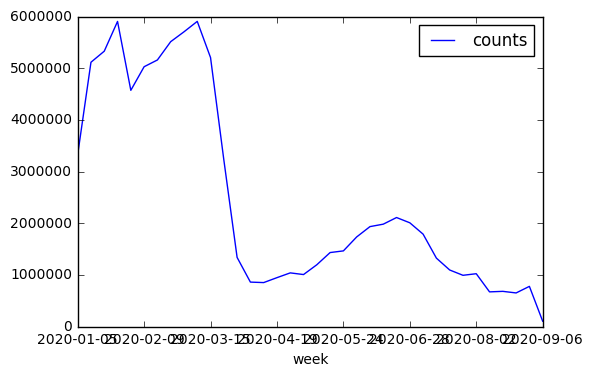

In [87]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

p=pd.DataFrame(new_df.groupby('week')['counts'].sum())
plot_df=pd.DataFrame(new_df)
plot_df.date_time=pd.to_datetime(plot_df.week)

lines = p.plot.line()


In [89]:
#new_df.to_json(orient="records")  # for reading into d3 code
# dont show..

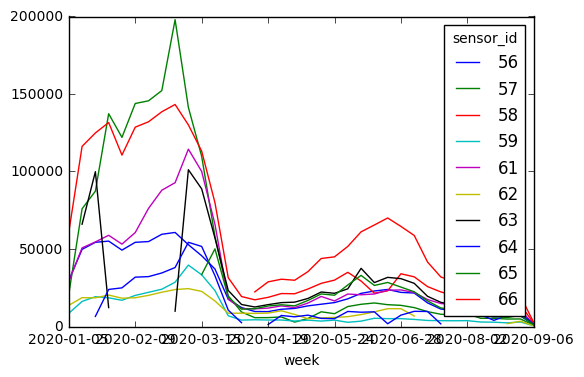

In [95]:
df5=new_df
df5=df5[df5.sensor_id > 55]
df5 = df5.pivot(index='week', columns='sensor_id', values='counts')   # look at individual sensors..but only a few (ids> 55)

df5.plot()

In [71]:
new_df.to_json('combined.json',orient='records')  # write file to json for d3 viz